# CS146 Problem Set 1: Automated Inference with PyMC

**In addition to the LOs indicated below, you will receive overall grades on #PythonImplementation and #Professionalism.**

## Problem 1: Create a prior (#Modeling)

The PyMC code for the following model is provided in the code cell below.

$$x \sim \text{Normal}(\mu, \sigma^2)$$

$$p = \frac{1}{1 + e^{-x}}$$

$$y \sim \text{Binomial}(n=20, p)$$

We want to select values of $\mu$ and $\sigma$ such that the prior-predictive distribution over $y$ is fairly flat but with approximately 80% of its probability mass to the left of 10 and approximately 20% of its probability mass to the right of 10.

**Run the code cell below** to see the desired prior-predictive distribution.

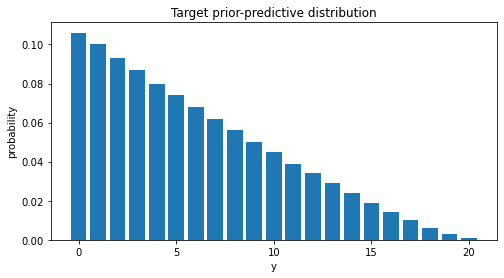

In [1]:
# Here is the desired prior-predictive distribution

import matplotlib.pyplot as plt
import numpy as np

target_y = np.arange(21)
target_prob = [
    0.106, 0.100, 0.093, 0.087, 0.080, 0.074, 0.068, 0.062, 0.056,
    0.050, 0.045, 0.039, 0.034, 0.029, 0.024, 0.019, 0.014, 0.010,
    0.006, 0.003, 0.001]

plt.figure(figsize=(8, 4))
plt.title('Target prior-predictive distribution')
plt.xlabel('y')
plt.ylabel('probability')
plt.bar(target_y, target_prob, width=0.8)
plt.show()

**Task:** Set up the model in PyMC and use it to identify appropriate values for $\mu$ and $\sigma$.

**Hint:** To define $p$ in terms of $x$ in PyMC, you can use `p = pm.Deterministic('p', 1/(1+pm.math.exp(-x)))`

/Users/ngttam3010/opt/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
/Users/ngttam3010/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


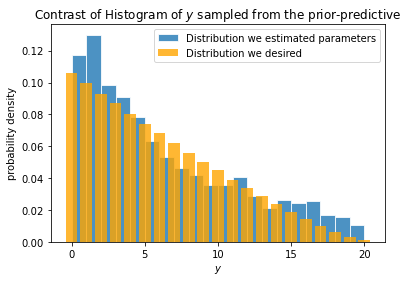

In [2]:
import pymc as pm
prior_mu = -1.22
prior_s_squared = 1.55
with pm.Model() as model:
    # TASK: Define the model
    x = pm.Normal('x', mu=prior_mu, sigma=prior_s_squared)
    p = pm.Deterministic('p', 1/(1+pm.math.exp(-x)))
    pm.Binomial('y', n=20, p=p, observed =10)

# TASK: Generate samples from the prior-predictive distribution
n_samples = 2000
with model:
    inference = pm.sample_prior_predictive(n_samples)

# TASK: Compare your samples to the desired prior-predictive
#       distribution and adjust mu and sigma to match it.

plt.figure(figsize=(6, 4))
plt.title('Contrast of Histogram of $y$ sampled from the prior-predictive')
plt.xlabel('$y$')
plt.ylabel('probability density')
plt.hist(
    inference.prior_predictive.y.values.flatten(), bins=20, density=True,
    edgecolor='white', alpha = 0.8, label = 'Distribution we estimated parameters')
plt.bar(target_y, target_prob, width=0.8, color = 'orange', alpha = 0.8, label = 'Distribution we desired')
plt.legend()
plt.show()

In approximately 100 words, summarize where you started your search for appropriate $(\mu,\sigma)$ values and how you arrived at your final values. Make a plot to show how close your distribution is to the desired distribution.

_MY ANSWER:_

My overall strategy is to fix 1 parameter, then increase or decrease the other parameter to see which direction of change causes the result to come closer to the desired prior-predictive distribution. With that strategy, I am assuming a simplification about the way two parameters interact with each other and affect the model. I started with both parameters to be 1. I fixed the variance, changed the mean to 0 and 2 to see which direction is better. I tried to find a value of mean with a variance of 1 so that the distribution can be monotonic and left-skewed as the desired one. After that, I fixed the mean, moved back to experimenting with the variance, noticing the second digits to achieve greater exactitude. When I was satisfied with the variance, I can just go back to the mean to account for surprising possibilities due to interaction between 2 parameters. Eventually, I decided to take mean = -1.22 and variance = 1.55. Also, beware that because we are sampling, different runs of program can produce different results. Therefore, I accept fluctuations in this experiment and understand that perfection is not possible here.

## Problem 2: Fit a posterior (#InterpretingResults)

**Tasks:**

* Use PyMC to fit the model below to the data set provided below.
* Check that your sampler is working correctly.
* Plot and interpret the posterior.
* Show all your work in detail.

**Model:**

$$\lambda \sim \text{Exponential}(1)$$

$$x_i \sim \text{Poisson}(\lambda) \quad i=1,\ldots,30$$

**The data set** is provided in the code cell below.

In [3]:
import pymc as pm
data = [
    3, 4, 2, 0, 3, 3, 2, 0, 0, 0, 3, 3, 0, 4, 4,
    2, 6, 6, 0, 0, 4, 3, 5, 2, 0, 3, 2, 2, 3, 2]

# YOUR WORK GOES HERE
# PROVIDE CODE COMMENTS TO EXPLAIN YOUR WORK

# Define the model
with pm.Model() as model:
    # Prior
    l = pm.Exponential('l', 1)
    
    # Likelihood
    pm.Poisson('x', l, observed = data)

In [4]:
# Sample from the prior and prior-predictive distributions
n_samples = 2000
with model:
    inference = pm.sample_prior_predictive(n_samples)

inference

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

(array([5.40869048e-01, 8.80238095e-02, 6.40238095e-02, 1.07738095e-02,
        5.20238095e-03, 3.95238095e-03, 5.83333333e-04, 6.78571429e-04,
        9.52380952e-05, 8.33333333e-05]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

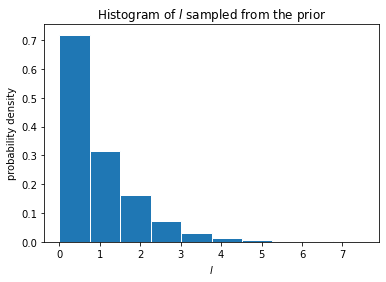

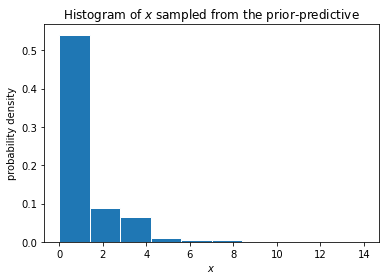

In [5]:
plt.figure(figsize=(6, 4))
plt.title('Histogram of $l$ sampled from the prior')
plt.xlabel('$l$')
plt.ylabel('probability density')
plt.hist(
    inference.prior.l.values.flatten(), bins=10, density=True,
    edgecolor='white')

plt.figure(figsize=(6, 4))
plt.title('Histogram of $x$ sampled from the prior-predictive')
plt.xlabel('$x$')
plt.ylabel('probability density')
plt.hist(
    inference.prior_predictive.x.values.flatten(), bins=10, density=True,
    edgecolor='white')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


(array([0.00402965, 0.00805931, 0.0604448 , 0.08462273, 0.21357164,
        0.27401645, 0.43923224, 0.62459631, 0.8341383 , 1.09203613,
        1.29351881, 1.38620084, 1.43455668, 1.55141664, 1.23710366,
        1.28948915, 0.9550279 , 0.91473137, 0.60041839, 0.58027012,
        0.39893571, 0.30222402, 0.20954199, 0.11685995, 0.07253376,
        0.04432619, 0.05641515, 0.01611861, 0.01208896, 0.01208896]),
 array([1.4872722 , 1.54931227, 1.61135235, 1.67339242, 1.73543249,
        1.79747256, 1.85951263, 1.92155271, 1.98359278, 2.04563285,
        2.10767292, 2.16971299, 2.23175307, 2.29379314, 2.35583321,
        2.41787328, 2.47991335, 2.54195343, 2.6039935 , 2.66603357,
        2.72807364, 2.79011371, 2.85215379, 2.91419386, 2.97623393,
        3.038274  , 3.10031407, 3.16235415, 3.22439422, 3.28643429,
        3.34847436]),
 <a list of 30 Patch objects>)

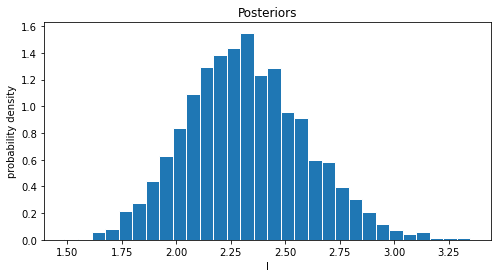

In [6]:
n_samples = 2000
with model:
    inference = pm.sample()
    pm.sample_posterior_predictive(
            inference, extend_inferencedata=True)

plt.figure(figsize=(8, 4))
plt.title('Posteriors')
plt.xlabel('l')
plt.ylabel('probability density')

plt.hist(
    inference.posterior.l.values.flatten(),
    bins=30, density=True, edgecolor='white')

In [7]:
import arviz as az

az.summary(inference)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
l,2.319,0.276,1.803,2.836,0.006,0.005,1817.0,2790.0,1.0


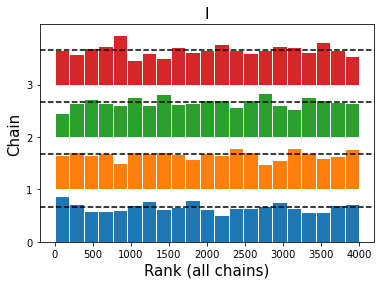

In [8]:
az.plot_rank(inference)

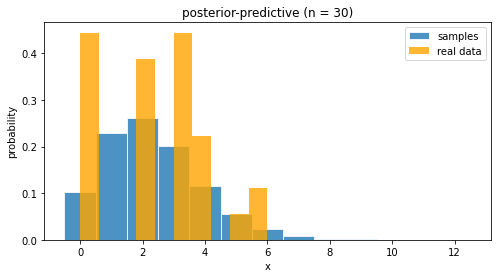

In [9]:
n = 30
plt.figure(figsize=(8, 4))
plt.title(f'posterior-predictive (n = {n})')
plt.xlabel('x')
plt.ylabel('probability')
samples = inference.posterior_predictive.x.values.flatten()
x = np.arange(np.min(samples), np.max(samples) + 2)
plt.hist(
    samples, bins=x-0.5, density=True,
    edgecolor='white', label='samples', alpha = 0.8)
plt.hist(data, color = 'orange', label = 'real data', density = True, alpha = 0.8)
plt.legend()

Provide your comments on whether the sampler is working correctly and on what the posterior distribution tells us here.

_MY ANSWER:_

To check if the sampler is working correctly, I examine the prior-predictive distribution to verify the prior and then after getting the posterior distribution, I use both diagnostic approaches, namely sampling summary statistics and rank plot.

1. The prior-predictive distribution really appears as expected. Because our parameter follows an Exponential distribution and our data should follow a Poisson distribution, there seems to be nothing wrong with the first two histograms above

2. Now, we should notice sampling summary statistics presented in the table above. R_hat, from the table, is reported to be 1.0 which is an ideal estimate. That indicates that our model is doing well. To support that conclusion, we can also look at ESS (Effective Sample Size) which is a very big number here (1518 and 2306).

3. To reinforce the belief that our model is doing a great job, we can also look at our rank plot. Ideally, all chains should present uniform distributions with the dashed lines representing the perfect uniformness. Look at the plot above, we can see that 4 distributions are roughly uniform with little inevitable variations. Furthermore, all 4 histograms are just slightly above or below the dashed lines, which is a clearly good sign.

Now, when we are safe trusting our model, we can start interpreting what the posterior distribution tells us. 

First, let's understand the real data we're given. We mostly have values of 0, 2 and 3 with a few data values larger than 3.
Meanwhile, our prior distribution is very right skewed and says that the most probable value for p is to be equal to 0 and 1.
Therefore, it makes so much sense for the Posterior histogram to tell that values with highest probability of p are shifting to the right. From the Posterior histogram, I can see that it is very normal-like and quite symmetrical around 2.25. 
Because our posterior distribution is not perfectly symmetrical, we cannot say it follows a normal distribution. However, we better understand that, with the data given, the rate of Poisson distribution should be more than 0 and 1, yet not too far away like 5 or 6.

## (Optional) Problem 2a: What about those zeros? (#ModelDebugging)

**This is a challenging problem.** Excellent answers that address _all_ of the tasks and questions below correctly will get a ⑤ on the #ModelDebugging LO. There is no penalty for not completing this problem or for getting it wrong.

Use the posterior-predictive distribution of this model to estimate how many 0s we would expect in a data set from the model. Compare this posterior-predictive distribution to the actual number of 0s in the data set and show that they don't match up. Explain how you can see that they don't match up. Finally, explain how you can change the model to better fit the data.

In [10]:
# YOUR CODE GOES HERE

_PROVIDE YOUR COMMENTS HERE_

## Problem 3: PyMC diagnostics

Look at the rank plot below and explain _in detail_ why the $\hat{R}$ diagnostic for this PyMC sampler might be larger than 1.0. You should write 100–200 words. If you do some research online to answer this question, be sure to cite your sources.

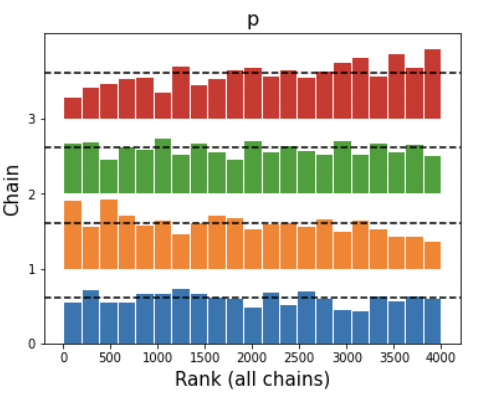

_MY ANSWER:_

To understand why R_hat should be larger than 1.0, we need to first understand a rank plot first. 

After we get a number of chains of data, we will take every data value we have, sort them into a list, and then predict the probability that each data value belongs to any of the chains we have. 
Ideally, every data value has equal probabilities to belong to any chains because the chains basically end up at the same place, or solve the same thing in the model. And in the case that all chains just perform similar jobs, we will get roughly uniform distributions, which means the model is doing good and R_hat is supposed to be 1.0

Here, when we examine the rank plot closely, we figure out:
1. Only the green and blue histograms are roughly uniform. Data are pretty evenly distributed and the difference from the ideal dashed line is remarkable
2. However, the red histogram has a big space in the leftmost part and a dense region in the rightmost part instead. To compensate for this, the orange histogram also has a very big space in the right tail while holds tall bins in the left end. 

For that reason, we can understand that 2 out of 4 chains work with different parts of the data. As a result, our model is not really doing a perfect job, which means R_hat is not supposed to larger than 1.0.